# Variation der Helligkeit (Beispiel für Augmentation)

Um das neuronale Netz später robust gegenüber Variationen der Bilder zu gestalten, aber gleichzeitig die Anzahl der Trainingsbilder gering zu halten, wird hier das Mittel der künstlichen Bildvariation verwenden (Augmentation)
Hier wird dies zunächst am Beispiel der Bildhelligkeit gezeigt.

### Vorbereitung (Laden der Bibliotheken und Einstellungen)
Für die Bildbearbeitung und Dateioperationen wird hier auch noch zusätzlich erstmals die Funktion "ImageDataGenerator" der Tensorflow-Bibliothek benötigt.

In [2]:
from PIL import Image 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

### Laden des Beispielbilds und Umwandlung in ein Bildarray
Die Tensorflow-Matrix verwendet als Eingang für das spätere Training die Bildaten in einem Mehrdimensionalen Array. Das hier verwendet Bild hat die Dimension [86, 48, 3], wobei die ersten beiden der Größe entspricht (86x48 Pixel) und die anderen den 3 Farben (RGB).
Da der Operator für die Augmentation später grundsätzlich für mehrere Bilder ausgelegt ist, muss dieses Array noch um eine Dimension erweitert werden, in der später über die einzelnen Bilder iteriert wird. Hier ist diese zusätzliche Dimension nur notwendig, um das korrekte Datenformat für den nächsten Schritt zu haben.

In [3]:
img = Image.open('Size_Example_1.jpg')
data = np.array(img)

print("Dimension des Bildarrays: ")
print(data.shape)

sample = np.expand_dims(data, 0)
print("Zusätzliche Dimension des Bildarrays für die Augmentation: ")
print(sample.shape)


Dimension des Bildarrays: 
(86, 48, 3)
Zusätzliche Dimension des Bildarrays für die Augmentation: 
(1, 86, 48, 3)


### Definition des Augmentation-Operators
Die Variation der Bilder ist über einen Iterator umgesetzt. Zunächst wird über die Funktion "ImageDataGenerator" definiert, was variert werdne soll. Hier ist es die Helligkeit, die über ein Intervall angegeben wird, wobei gilt:
* 0 = schwarz
* 1 = unverändert
* größer 1 = aufhellen

Hier wird die Helligkeit zwischen [0.5, 1.5] variert.

Im zweiten Schritt werden dem Iterator noch die Eingangsbilder (hier nur ein einzelnes) und die Anzahl an Bilder zurückgegen, die bei jedem Aufruf zurückgeben werden solle - das sogenannte Batch - hier natürlich auch nur ein einziges. Das bedeutet dann: bei jedem Aufruf des iterators (siehe nächster Schritt), wird genau ein Bild zurück geliefert und dieses wird in der Helligkeit im Intervall [0.5, 1] variiert.

Anschließend wird der Iterator beispielhaft aufgerufen, ein Bild abgerufen (iterator.next()). Zurückgeben wird natürlich ein Batch, welches nur ein Bild enthät (image = batch[0]...). Dieses kann dann dargestellt werden. Wenn der Iterator mehrfach aufgerufen wird, sieht man, wie das Bild variiert.

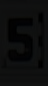

In [14]:
Brightness_Range = 1
datagen = ImageDataGenerator(brightness_range = [1-Brightness_Range,1+Brightness_Range])

iterator = datagen.flow(sample, batch_size=1)


batch = iterator.next()
image = batch[0].astype('uint8')
display(Image.fromarray(image))

### Überblick über die Variationen
Hier werden jetzt in einem 5x5 Array 25 unterschiedliche Variationen dargestellt.

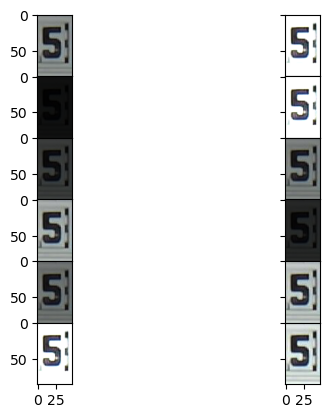

In [8]:
fig, axs = pyplot.subplots(6, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
for x in range(6):
    for y in range (2):
        batch = iterator.next()
        image = batch[0].astype('uint8')
        axs[x, y].imshow(image)